In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [15]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/discounts/data/discounts-0_pendulum-v0/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/discounts/data/discounts-0_pendulum-v0/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPreictionError,GoalDiscount,...,ActionsClipFrac,ActionsStopIter,LossActionInverse,DeltaLossActionInverse,LossGoalInverse,DeltaLossGoalInverse,Unit,Condition1,Condition2,Performance
0,0,-1367.99410,230.702670,200.0,1.019186,0.442365,0.201845,0.572513,0.599286,0.492188,...,0.043333,79.0,0.411803,-0.102077,0.206272,-0.056750,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1367.99410
1,1,-1377.25430,191.146090,200.0,1.019182,0.445887,0.233443,0.564987,0.431763,0.492188,...,0.082083,79.0,0.382243,-0.017605,0.167427,-0.039821,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1377.25430
2,2,-1406.01110,190.104350,200.0,1.016000,0.440148,0.261692,0.565352,0.379344,0.492188,...,0.104583,79.0,0.368110,-0.017440,0.132166,-0.032622,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1406.01110
3,3,-1360.41150,267.029420,200.0,1.020460,0.448771,0.189259,0.564674,0.349030,0.492188,...,0.087083,79.0,0.366967,-0.010815,0.108133,-0.024154,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1360.41150
4,4,-1337.41080,237.347030,200.0,1.028384,0.459500,0.197584,0.555651,0.318366,0.492188,...,0.103750,79.0,0.358096,-0.012579,0.084626,-0.021277,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1337.41080
5,5,-1484.65950,263.735200,200.0,1.018757,0.429167,0.300343,0.588477,0.216992,0.492188,...,0.140833,79.0,0.355097,-0.005572,0.079455,-0.010073,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1484.65950
6,6,-1511.33460,276.151670,200.0,1.018761,0.431162,0.701686,0.589805,0.202915,0.492188,...,0.130000,79.0,0.347137,-0.007273,0.064173,-0.010612,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1511.33460
7,7,-1454.81400,302.903230,200.0,1.025169,0.442668,0.205896,0.575456,0.195667,0.492188,...,0.128750,79.0,0.351658,-0.000604,0.052014,-0.009863,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1454.81400
8,8,-1468.08260,271.238460,200.0,1.021533,0.451126,0.385045,0.553516,0.157111,0.492188,...,0.128333,79.0,0.343382,-0.003320,0.046023,-0.006367,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1468.08260
9,9,-1475.27540,308.256440,200.0,1.026232,0.459701,0.248637,0.557904,0.146997,0.492188,...,0.143333,79.0,0.353458,0.009562,0.038072,-0.006284,15,discounts-0_pendulum-v0,discounts-0_pendulum-v0-15,-1475.27540


In [16]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves
0,discounts-0_pendulum-v0,2400,6


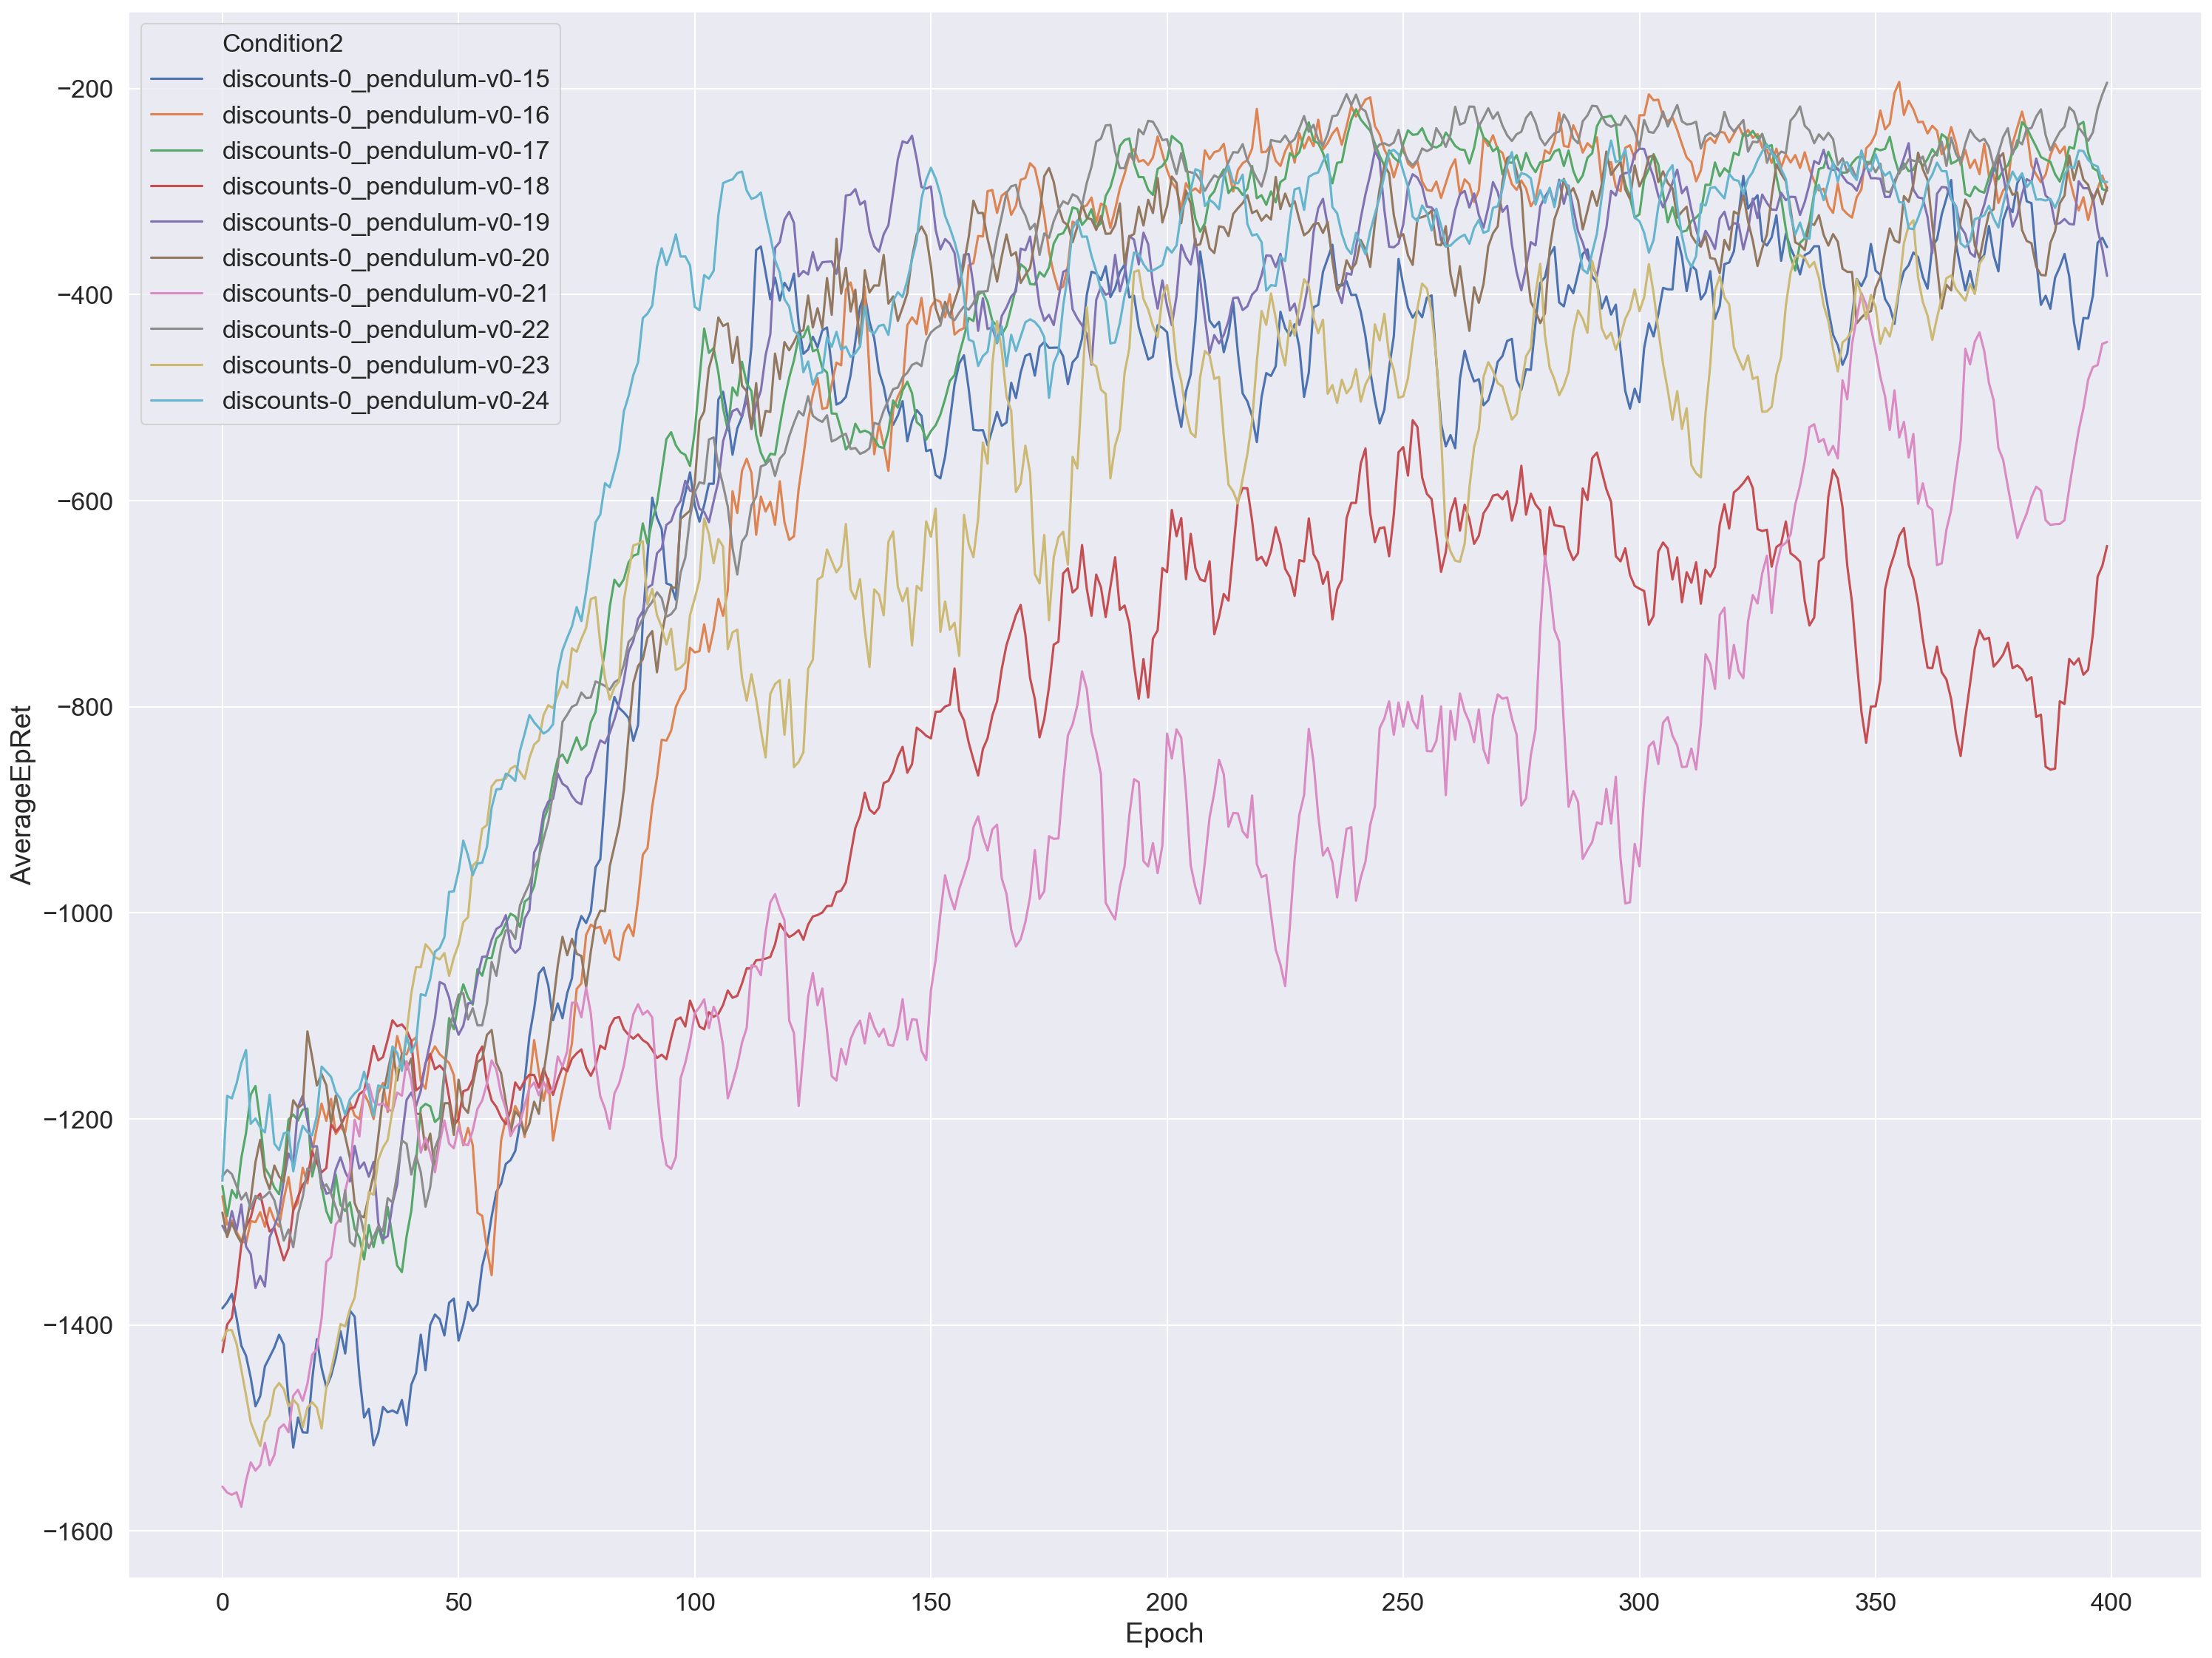

In [17]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, condition='Condition2')
plt.show()

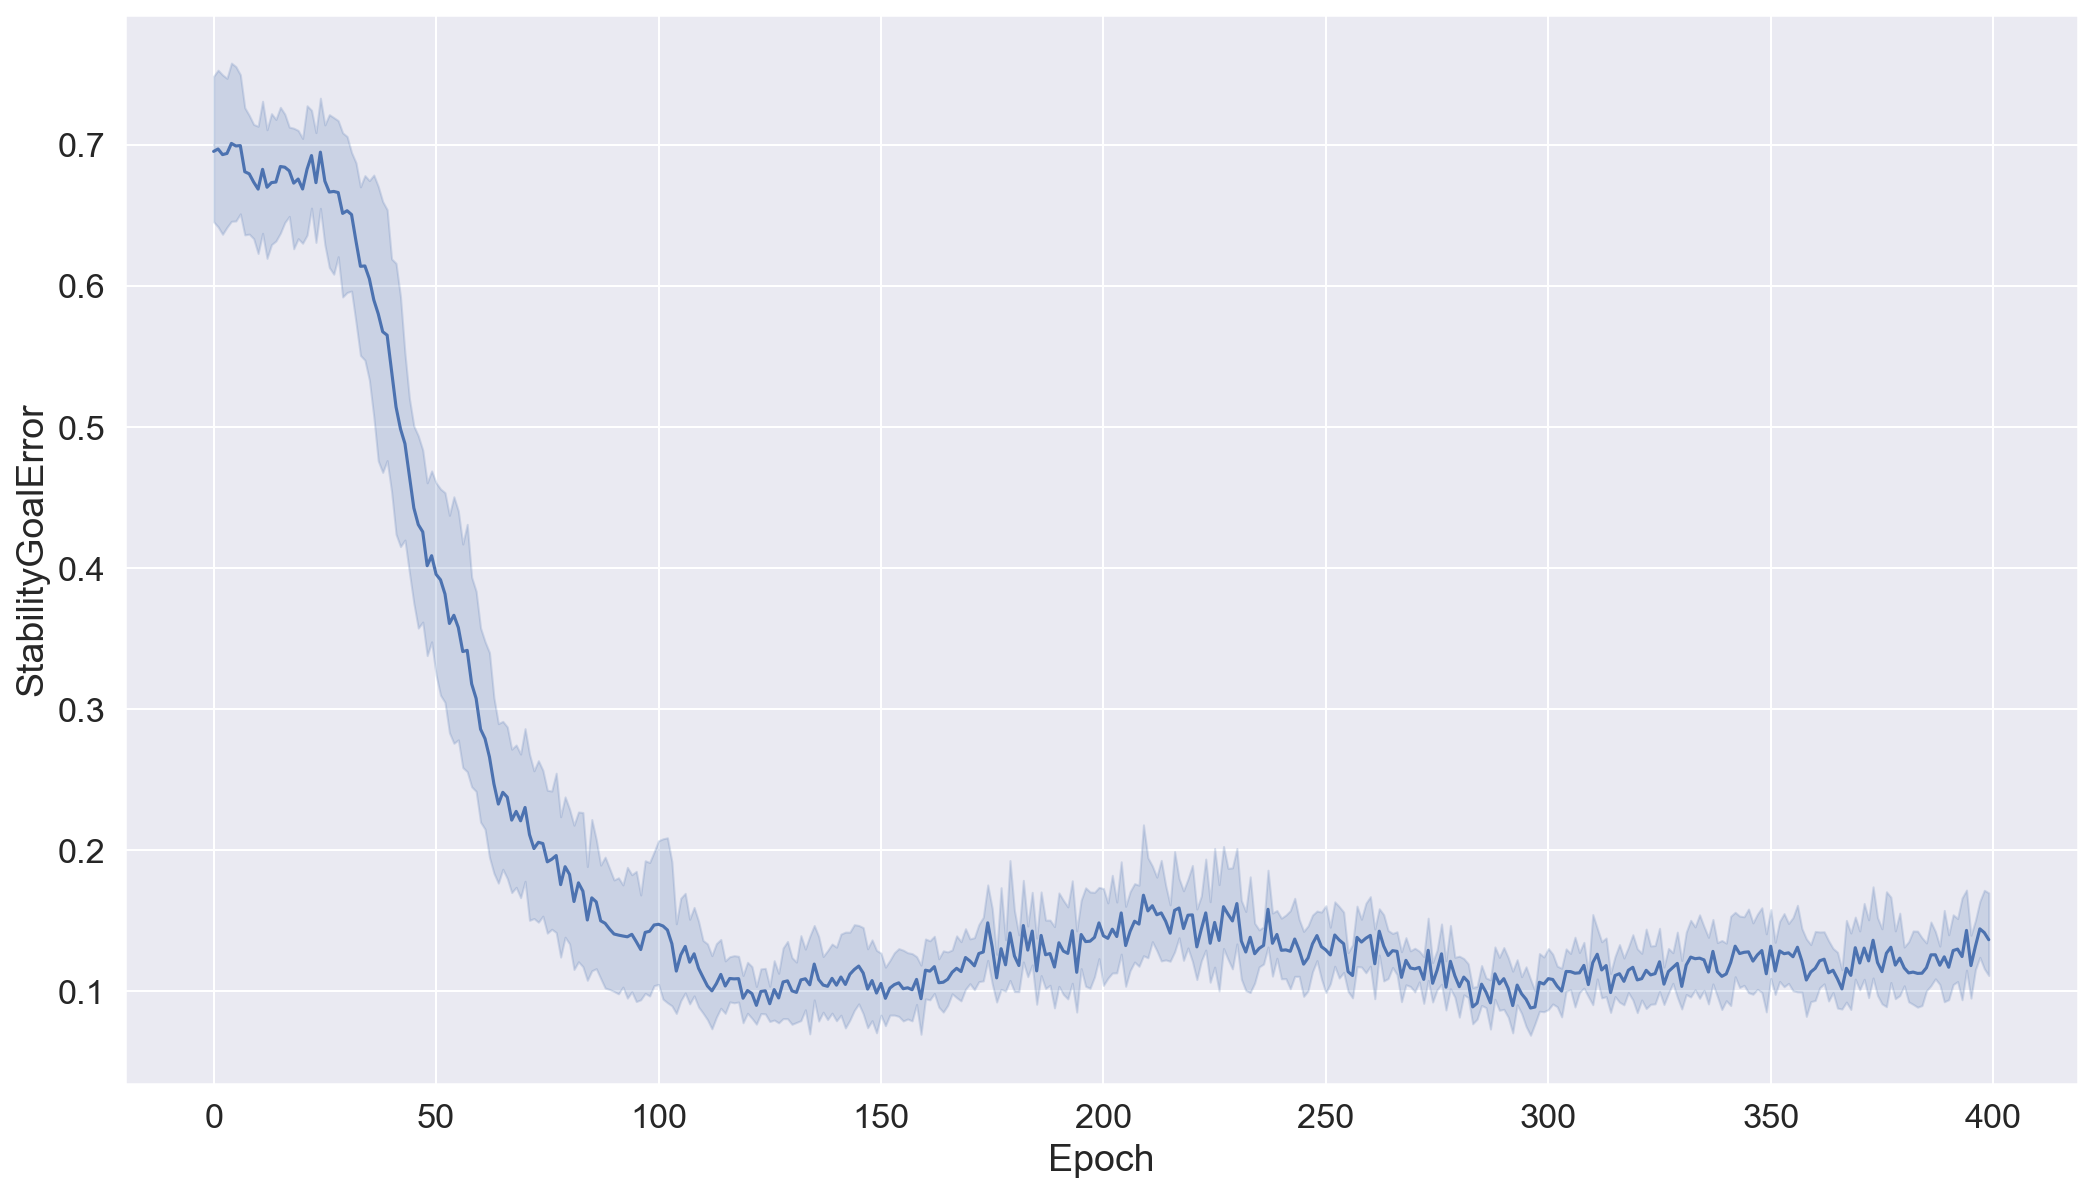

In [18]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

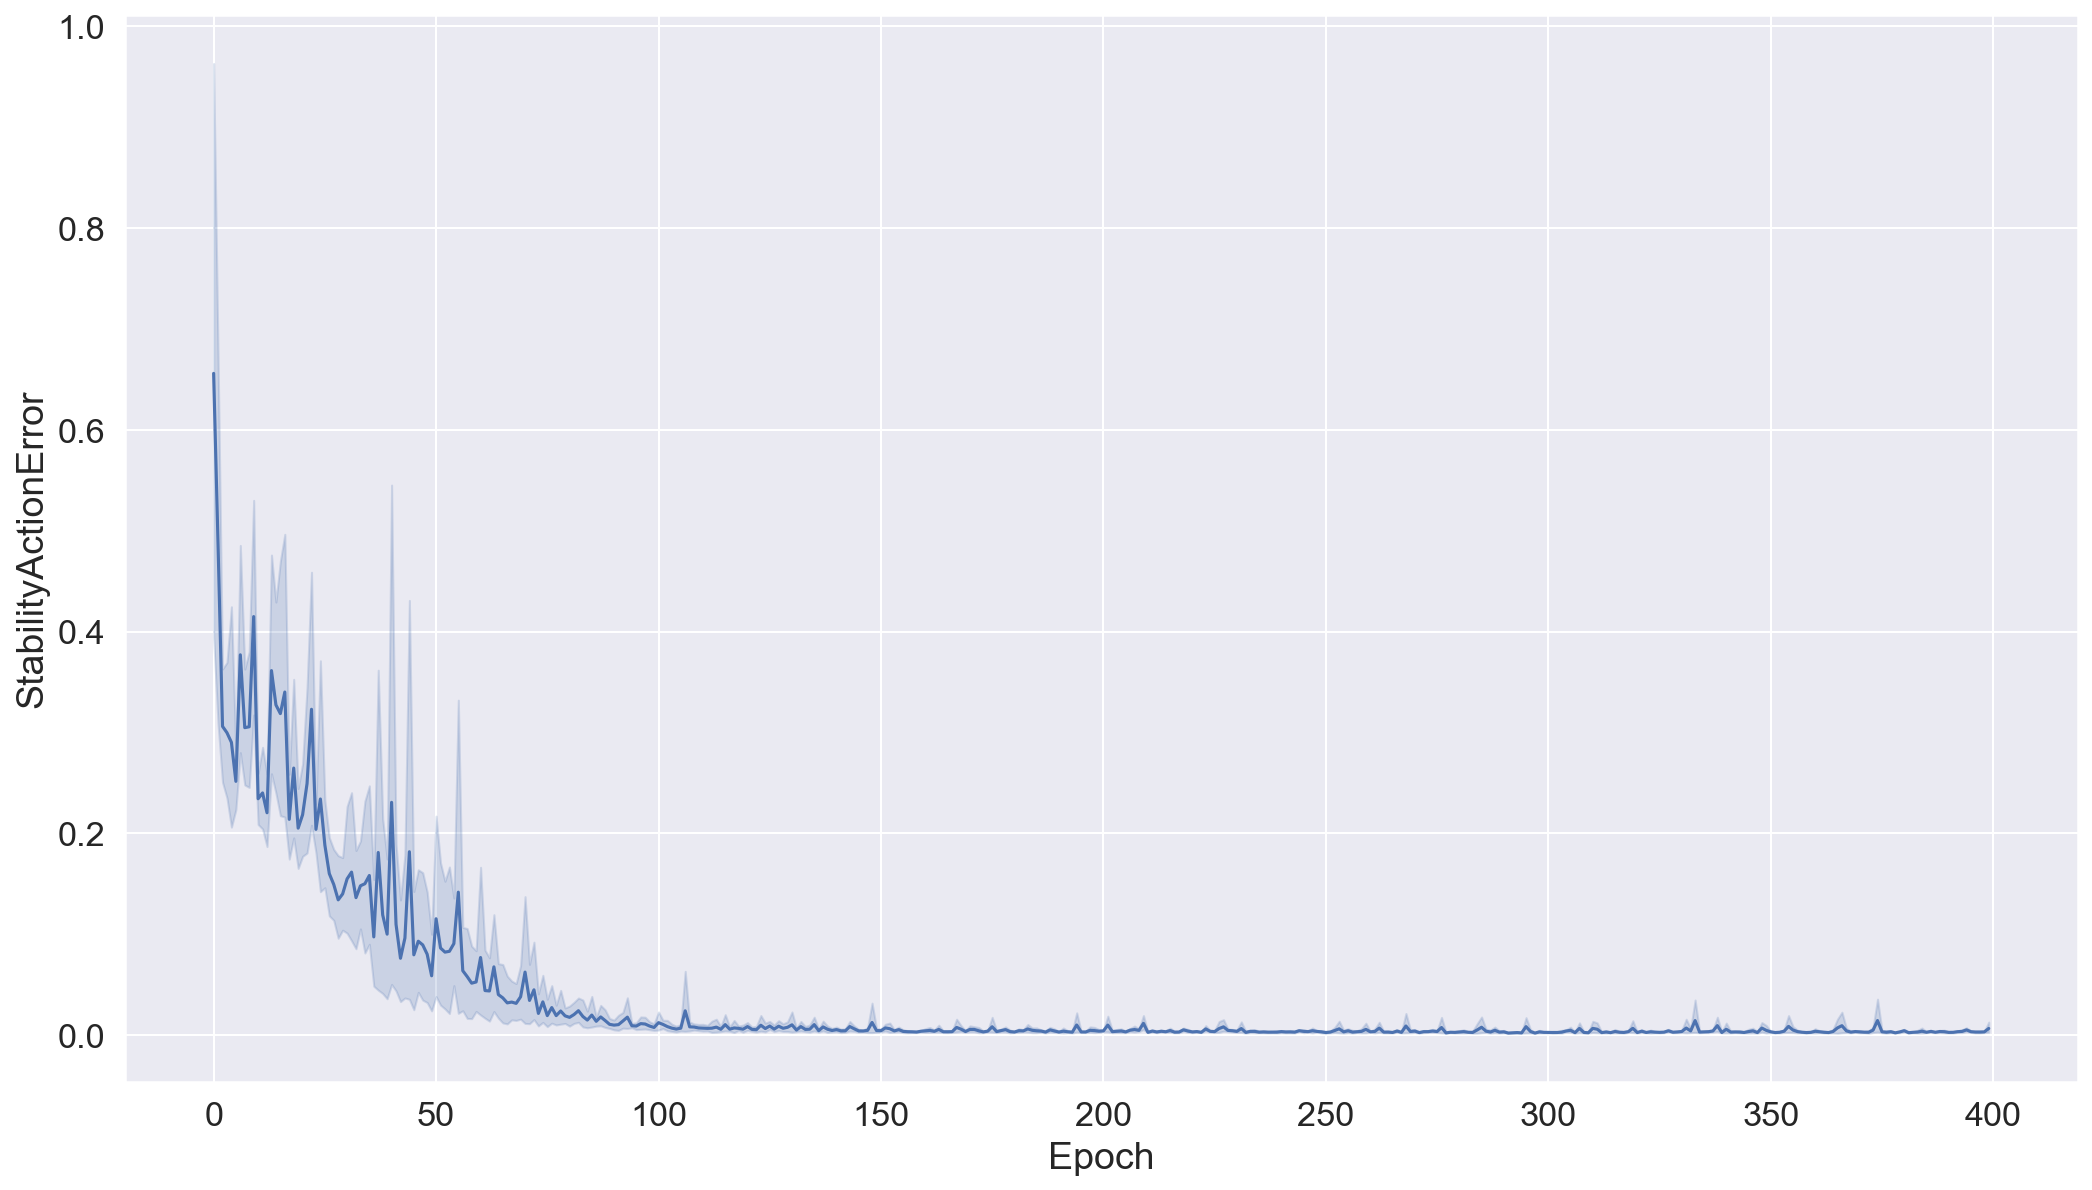

In [11]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

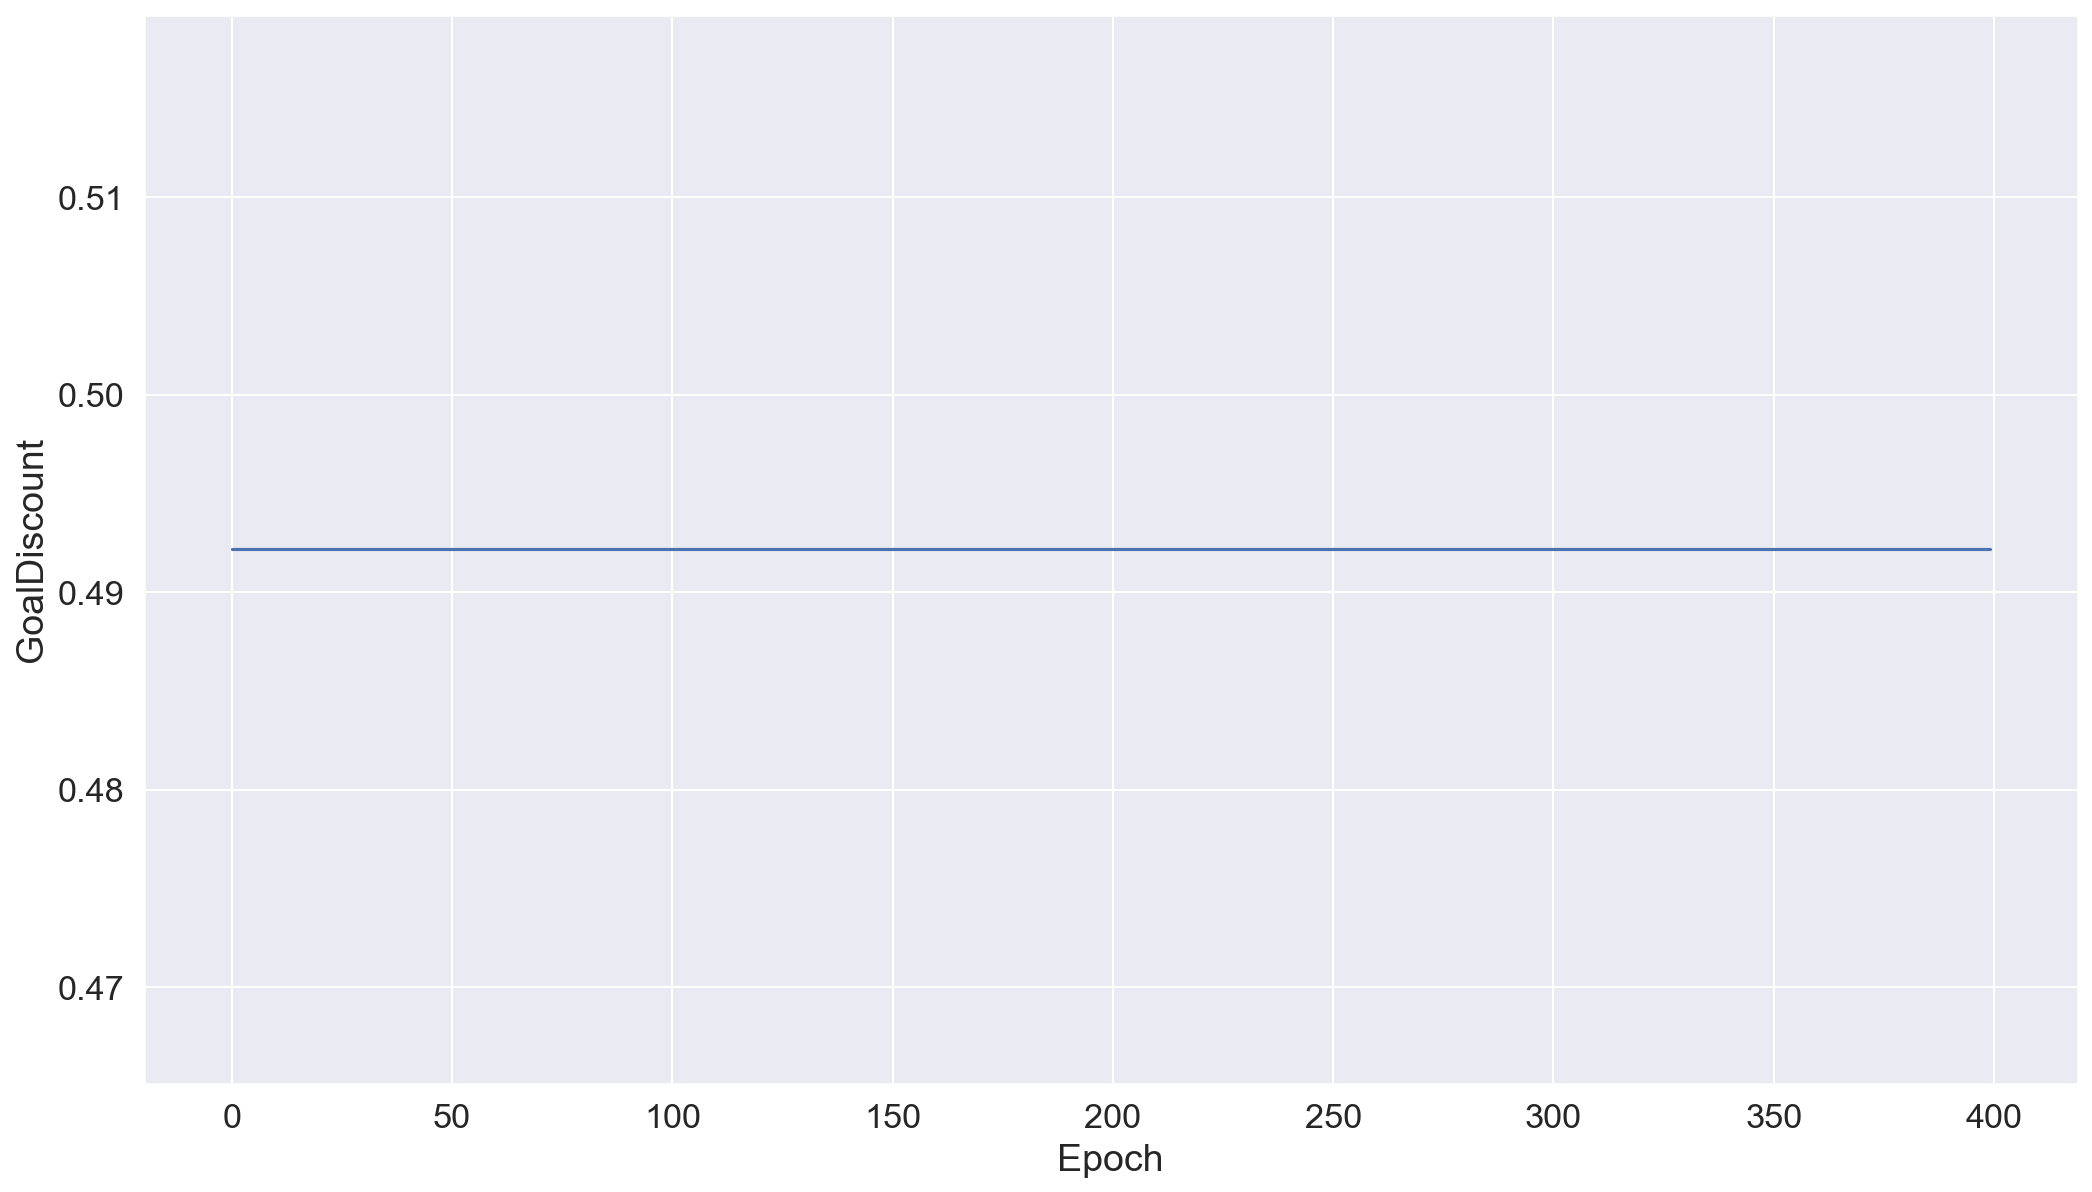

In [12]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalDiscount', smooth=1, show_legend=False)
plt.show()

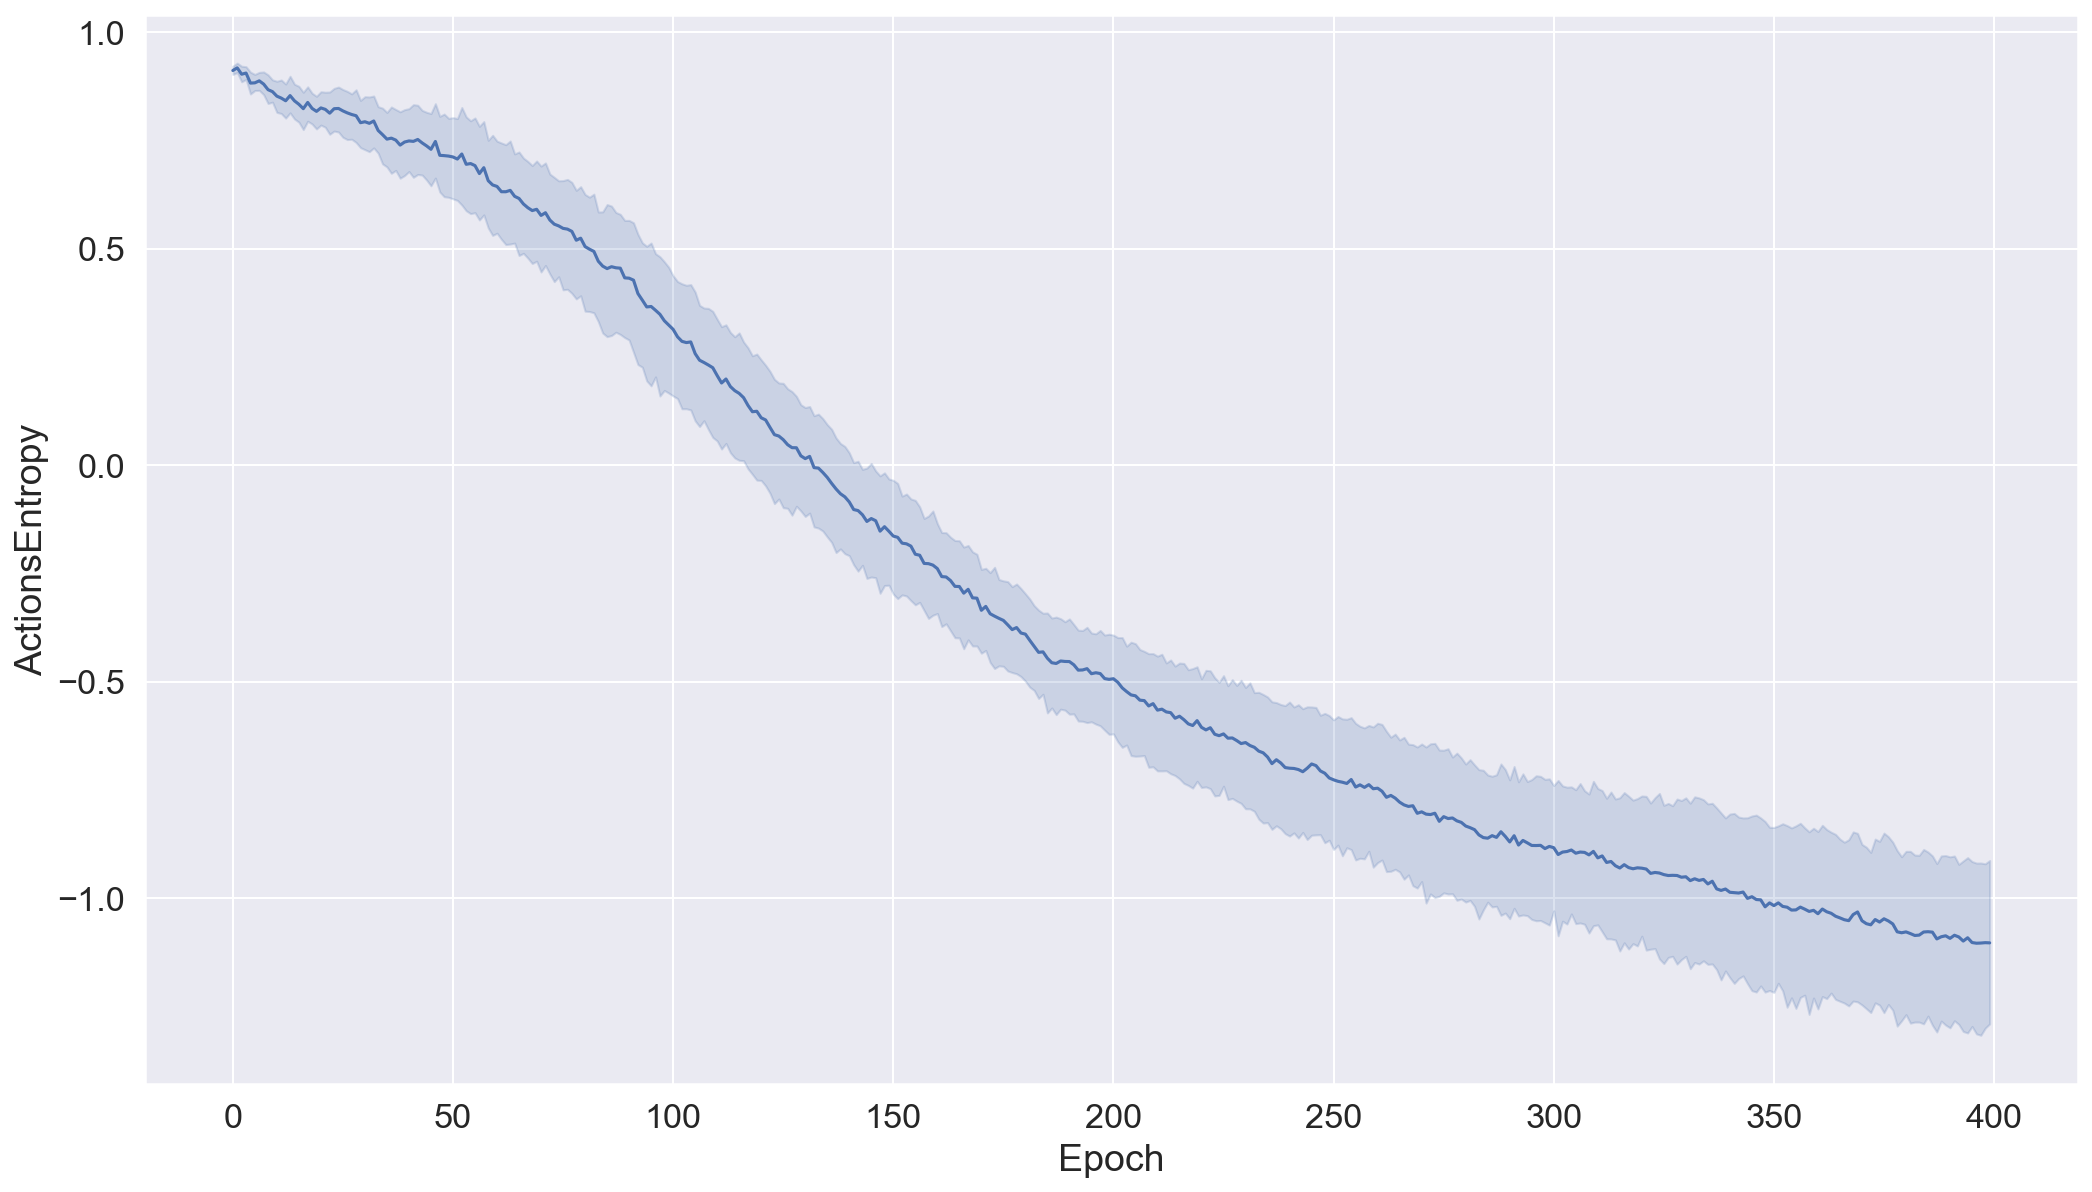

In [13]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

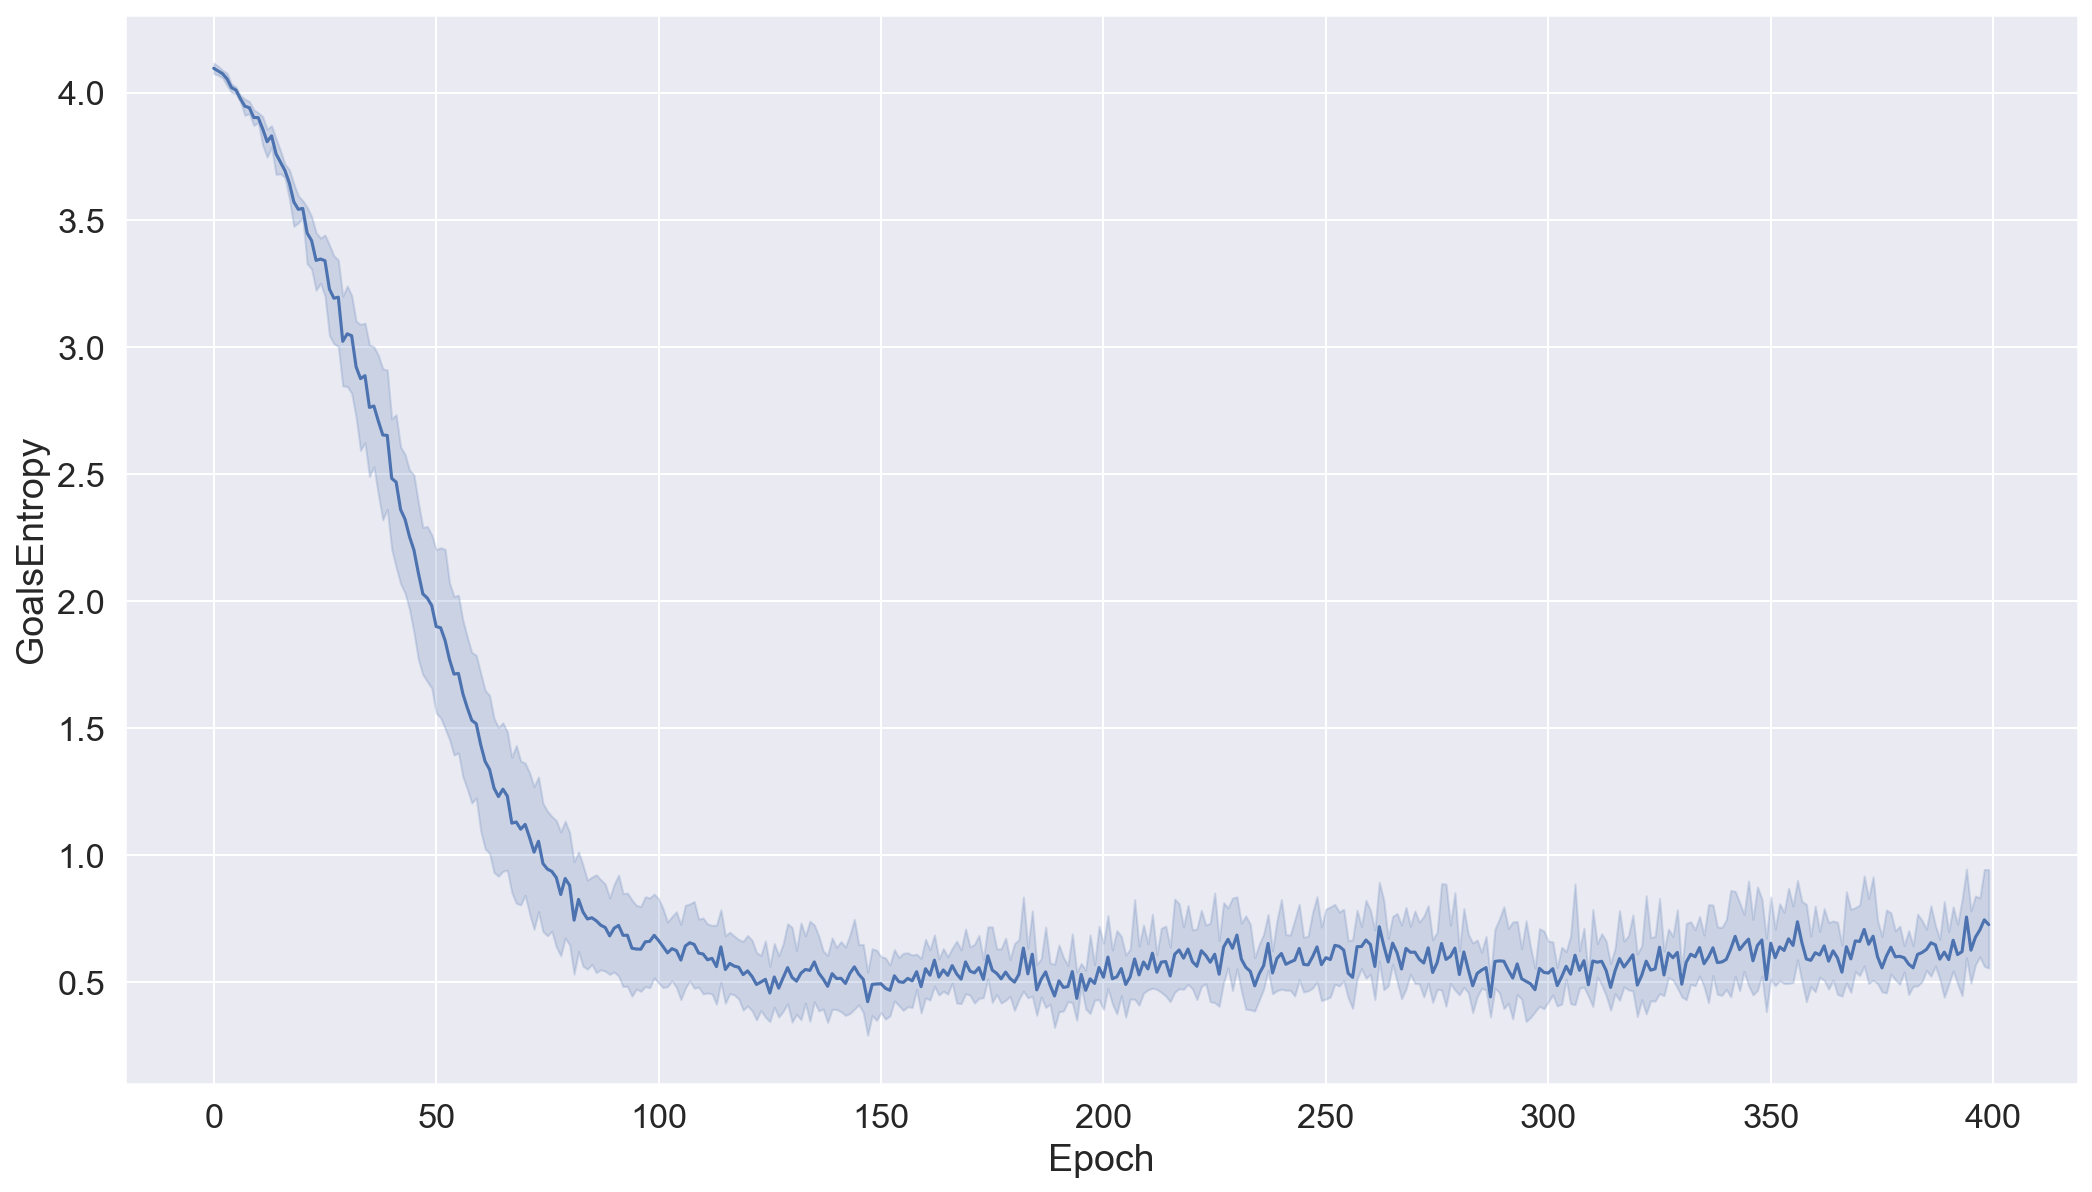

In [14]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()